k= -5.13055159445962 b= -0.17919826111696557
error：-1.3877787807814457e-17
求解的拟合直线为:
y=-5.13x+-0.18


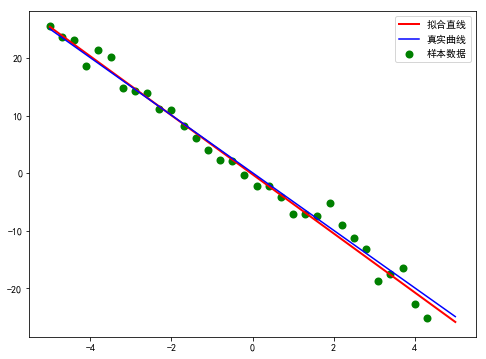

In [2]:
##最小二乘法
import numpy as np  ##科学计算库
import matplotlib.pyplot as plt  ##绘图库

##样本数据(Xi,Yi)，需要转换成数组(列表)形式
X = np.arange(-5, 5, 0.3)[:32].reshape((32, 1))
Y = -5 * X + 0.1 * np.random.normal(loc=0.0, scale=20.0, size=X.shape)
Xi = X.reshape(32)
Yi = Y.reshape(32)


def Leastsq(x, y):  # 最小二乘法解析公式,这里的x,y更上面的Xi,Yi中是一一对应的，都是一维数组
    if len(x) != len(y):
        print("数组长度不一致！")
        return -1
    n = len(x)
    a1 = (x * y).sum() - n * x.sum() / n * y.sum() / n
    a2 = (x * x).sum() - n * x.sum() / n * x.sum() / n
    k = a1 / a2
    b = y.sum() / n - k * x.sum() / n
    return k, b


k, b = Leastsq(Xi, Yi)


##偏差函数：x,y都是一维数组:这里的x,y更上面的Xi,Yi中是一一对应的
def error(k, b, x, y):
    e = k * x + b - y
    return e.sum() / len(e)


print("k=", k, "b=", b)
print("error：" + str(error(k,b,Xi,Yi)))
print("求解的拟合直线为:")
print("y=" + str(round(k, 2)) + "x+" + str(round(b, 2)))

# 画样本点
plt.figure(figsize=(8, 6))  ##指定图像比例： 8：6
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(Xi, Yi, color="green", label="样本数据", linewidth=2)
# 画拟合直线
x = np.linspace(-5, 5, 100)  ##在0-15直接画100个连续点
y = k * x + b  ##函数式
plt.plot(x, y, color="red", label="拟合直线", linewidth=2)
plt.plot(x, -5 * x + 0.1, c='b', label='真实曲线')
plt.legend()  # 绘制图例
plt.show()